# Predicting Premier League Matches
> Using Python and Random Forests to predict football matches

- toc: true 
- badges: true
- comments: true
- categories: [Random Forests, Football, Premier League,Python]

![](ghtop_images/header2.png)

## Overview

### Introduction

Predicting results of [English Premier League](https://en.wikipedia.org/wiki/Premier_League) using random forests for the 2017 to 2021 seasons. I will predict whether a result is a win, loss or draw, and then simplify as a binary question- is it a win?

From an article about pundit versus gambling company [Pinnacle vs. Mark Lawrenson](https://www.pinnacle.com/en/betting-articles/Soccer/Mark-Lawrenson-vs-Pinnacle-Sports/VGJ296E4BSYNURUB) we have a benchmark to aim for from the 2012 season:
- Mark Lawrenson = 52.6% accuracy
- Pinnacle traders = 55.3% accuracy
- Random guess = 33.3% accuracy

### Method

In this data there are various parameters that can be used. The most important step is to not use data about a current match as a predictor, but for a prediction to be based on stats from previous matches. (A couple of slight exceptions to this are below like who is playing who and where)

The predictors used here include:
- date of match
- home or away
- stats from previous matches
    - results
    - goals scored/conceded
    - possession/expected goals etc
- who is playing who


Some details on the machine learning:

- A Random Forest [Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) was the main model used for analysis. 
- Data is trained on years 2017 to 2020 with season 2021 used as validation
    - 20% validation / 80% training
- Some data cleaning methods were performed and shown in the code

### Results

- Model accuracy = 52% (+-1%)
    - So the model is comparable with the results of Mark Lawrenson
- The model is okay as it matches the accuracy from an expert pundit. But it does underperform gambing predictions. 

- Draws are under-represented by the model
    - draws predicted was increased by adjusting the input parameter `class_weight` but the issue was only reduced 
- Changing input parameters was done in a semi-manual manner, obtaining the best input parameters was not easy

- The more data the better, 
    - but the increase from just using a basic four parameter fit to one with 300+ columns is relatively small (a difference of ~1-2% (based on values 50-65%))

- By searching for the best hyper parameters the results of a random forest (RF) model were increased from 49% accuracy to 52%

- RF, XG boost and grad boost methods all performed similar
    - Ridge model was the worst performing
    - Neural networks with fastai tabular data also performed poorly. [NN analysis of EPL](https://www.kaggle.com/code/thomassimm/nlp-disaster-nn)
    
- Similar results were obtained by using classification and regression methods
    - Regression on the net score performed the best
    - Regression methods performed worse on predicting draws though
    
- Ensembling (combining results from different methods by adding them) can increase the overall results. The accuracy would need to be comparable and the results different enough for their to be a benefit

A summary of the results is shown below


|Accuracy W/L/D|Accuracy Win |Classification/Regression| Details|
|--------------|------------|---------|----|
|0.489		|0.669|		Classification|RF with all parameters|
|0.479		|0.661|		Classification|RF with 43 parameters from feature imp|
|0.487		|0.666|		Classification| RF as above with basic features|
|0.484		|0.656|		Classification| RF with 4 basic features|
|0.479		|-	|      	Classification| RF with 4 basic ones + balanced|
|0.485		|0.656|		Classification| RF with 23 correlation parameters plus basic|
|0.451		|0.678|		Regression| RF with all parameters on net score |
|-			|0.657|		Regression| XGB with all parameters on net score |
|-          |0.639|     Regression| Ridge with all parameters on net score |
|-          |0.666|     Regression| Grad boost with all parameters on net score |
|0.427      |0.670|     Regression| RF with all parameters on GF/GA |
|-          |0.670|     Regression| XGB with all parameters on GF/GA score |
|-          |0.665|     Regression| RF+XGB+Grad boost on netscore |
|-          |0.678|     Regression| RF on netscore + RF on GF/GA |



### Code- Prepare the data

Data is prepared in a separate page- [Predicting Premier League Matches- Prepare the data](https://thomashsimm.com/pandas/football/premier%20league/python/2022/08/11/PredictingPremierLeagueMatches-PrepareTheData.html#Save-the-data)


# Possession Only

## Possession

- `possession_poss` 		- percentage of passes attempted
- `possession_touches` 	- Number of times a player touched the ball
- `possession_def pen`	- Touches in defensive penalty area
- `possession_def 3rd`	- Touches in defensive 3rd
- `possession_mid 3rd`	- Touches in mid 3rd 
- `possession_att 3rd`	- Touches in att 3rd
- `possession_att pen`	- Touches in att penalty area
- `possession_live` 		- live ball touches
- `possession_rec%` 		- Passes Received Percentage


## Passing Type
- `passingtype_tb`			- Completed pass sent between back defenders into open space
- `passingtype_press`			- Passes made while under pressure from opponent
- `passingtype_sw`			- Passes that travel more than 40 yards of the width of the pitch
- `passingtype_crs`			- crosses
- `passingtype_ground`			- Ground passes
- `passingtype_low`			- Passes that leave the ground, but stay below shoulder-level
- `passingtype_high`			- Passes that are above shoulder-level at the peak height
- `passingtype_head`			- Passes attempted using head
- `passingtype_cmp`			- Passes Completed
- `passingtype_blocks`			- Blocked by the opponent who was standing it the path

## Passing
- `passing_pass_complete`    - Passes Completed
- `passing_cmp%`             - Passes Completed %
- `passing_PC_totdist`       - Total distance, in yards, that completed passes have traveled in any direction divided by passes completed
- `passing_PC_prgdist`        - Total progressive distance (towards opponent goal), in yards, that completed passes have traveled in any direction divided by passes completed
- `passing_PC_cmp_.1`         - % Passes between 5 and 15 yards (of total completed passes)
- `passing_cmp%_.1`           - Pass completion % for passes between 5 and 15 yards
- `passing_PC_cmp_.2`         - % Passes between 15 and 30 yards (of total completed passes)
- `passing_cmp%_.2`           - Pass completion % for passes between 15 and 30 yards
- `passing_PC_cmp_.3`         - % Passes over 30 yards (of total completed passes)
- `passing_cmp%_.3`           - Pass completion % for passes over 30 yards
- `passing_PC_1/3`            - Completed passes that enter the 1/3 of the pitch closest to the goal as a % of completed passes
- `passing_PC_ppa`            - Completed passes into the 18-yard box as a % of completed passes
- `passing_PC_crspa`          - Completed crosses into the 18-yard box as a % of completed passes
- `passing_PC_prog`           - Progressive Passes as a % of completed passes (Completed passes that move the ball towards the opponent's goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area. Excludes passes from the defending 40% of the pitch)

## Load data and libraries

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
cwd=os.getcwd()


In [3]:
#hide
cwd=os.getcwd()
folda=cwd+"/data/epl/"
dira = os.listdir(folda)
dira


['dfEPL_2017.csv',
 'dfEPL_2018.csv',
 'dfEPL_2019.csv',
 'dfEPL_2020.csv',
 'dfEPL_2021.csv',
 'epl2017-2021.csv',
 'epl2017-2021_wivnetscore.csv',
 'epl2017-2021_wivnetscoreAndGFGA_both-HA.csv',
 'epl2017-2021_wivnetscoreAndGFGA_both-HA_modPC.csv',
 'epl2017-2021_wivnetscore_both-HA.csv']

In [10]:
#collapse-output

dfAll=pd.read_csv(folda+'epl2017-2021_wivnetscoreAndGFGA_both-HA_modPC.csv',index_col=0)
dfAll=dfAll.iloc[20:,:]
dfAll

,round,day,venue_x,result_x,gf_x,ga_x,opponent_x,shooting_gls_x,shooting_sh__x,shooting_sot_x,...,misc_int__y,misc_tklw__y,misc_pkwon_y,misc_pkcon_y,misc_og_y,misc_recov_y,misc_won_y,misc_lost_y,misc_won%_y,team_y
44,3,27,Home,0.000000,2.000000,2.000000,Everton,2.000000,14.500000,4.000000,...,13.000000,12.000000,0.000000,0.000000,0.000000,94.500000,19.500000,27.000000,41.150000,Everton
45,3,27,Away,0.000000,2.000000,2.000000,Liverpool,2.000000,23.000000,8.500000,...,16.000000,12.000000,0.500000,0.000000,0.000000,114.000000,28.500000,20.500000,57.450000,Liverpool
46,3,27,Away,0.000000,1.500000,1.500000,Tottenham Hotspur,1.500000,15.000000,3.000000,...,8.500000,9.000000,0.000000,0.000000,0.000000,91.000000,21.000000,22.500000,48.600000,Tottenham Hotspur
47,3,27,Away,0.500000,1.000000,0.500000,Chelsea,1.000000,8.000000,3.000000,...,7.000000,14.000000,0.000000,0.000000,0.500000,92.000000,23.500000,26.000000,47.850000,Chelsea
48,3,26,Away,0.500000,2.500000,2.000000,Manchester United,2.500000,10.000000,3.500000,...,16.000000,10.500000,0.000000,0.000000,0.000000,91.000000,21.500000,19.500000,50.300000,Manchester United
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,38,22,Away,0.333333,1.666667,1.333333,Arsenal,1.666667,9.333333,4.000000,...,10.000000,9.666667,0.000000,0.000000,0.333333,74.333333,14.666667,16.666667,46.466667,Arsenal
3796,38,22,Away,-1.666667,0.666667,2.333333,Brentford,0.666667,9.666667,2.333333,...,11.666667,6.666667,0.000000,0.666667,0.000000,80.333333,15.333333,15.666667,48.333333,Brentford
3797,38,22,Home,-0.666667,1.000000,1.666667,Newcastle United,1.000000,13.000000,4.333333,...,14.666667,13.000000,0.000000,0.000000,0.000000,64.333333,20.000000,19.000000,48.766667,Newcastle United
3798,38,22,Away,-2.000000,0.666667,2.666667,Chelsea,0.333333,10.666667,2.666667,...,11.666667,11.666667,0.333333,0.000000,0.000000,88.000000,17.666667,13.666667,57.066667,Chelsea


In [7]:
#collapse-output
with pd.option_context("display.max_columns", None):
    display(dfAll.describe(include='all'))

,round,day,result_x,gf_x,ga_x,shooting_gls_x,shooting_sh__x,shooting_sot_x,shooting_sot%_x,shooting_g/sh_x,shooting_g/sot_x,shooting_PC_dist_x,shooting_fk__x,shooting_pk_x,shooting_pkatt__x,shooting_xg_x,shooting_npxg_x,shooting_npxg/sh_x,shooting_g-xg_x,shooting_np:g-xg_x,keeper_sota_x,keeper_saves_x,keeper_save%_x,keeper_cs_x,keeper_psxg_x,keeper_psxg+/-_x,keeper_pkatt__x,keeper_pka_x,keeper_pksv_x,keeper_pkm_x,keeper_cmp__x,keeper_att__x,keeper_cmp%__x,keeper_att_.1_x,keeper_thr_x,keeper_launch%_x,keeper_avglen_x,keeper_att_.2_x,keeper_launch%.1_x,keeper_avglen.1_x,keeper_opp_x,keeper_stp_x,keeper_stp%_x,keeper_#opa_x,keeper_avgdist_x,passing_pass_complete_x,passing_cmp%__x,passing_PC_totdist__x,passing_PC_prgdist__x,passing_PC_cmp_.1_x,passing_cmp%_.1_x,passing_PC_cmp_.2_x,passing_cmp%_.2_x,passing_PC_cmp_.3_x,passing_cmp%_.3_x,passing_ast_x,passing_xa_x,passing_kp_x,passing_PC_1/3__x,passing_PC_ppa_x,passing_PC_crspa_x,passing_PC_prog__x,passing_PC_types_live__x,passing_PC_types_dead_x,passing_PC_types_fk__x,passing_PC_types_tb_x,passing_PC_types_press__x,passing_PC_types_sw_x,passing_PC_types_crs__x,passing_PC_types_ck_x,passing_PC_types_in_x,passing_PC_types_out_x,passing_PC_types_str_x,passing_PC_types_ground_x,passing_PC_types_low_x,passing_PC_types_high_x,passing_PC_types_left_x,passing_PC_types_right_x,passing_PC_types_head_x,passing_PC_types_ti_x,passing_PC_types_other_x,passing_PC_types_cmp__x,passing_PC_types_off__x,passing_PC_types_out.1_x,passing_PC_types_int__x,passing_PC_types_blocks__x,shotcreate_sca_x,shotcreate_passlive_x,shotcreate_passdead_x,shotcreate_drib_x,shotcreate_sh_gca_x,shotcreate_fld_gca_x,shotcreate_def_x,shotcreate_gca_x,shotcreate_passlive.1_x,shotcreate_passdead.1_x,shotcreate_drib.1_x,shotcreate_sh_gca.1_x,shotcreate_fld_gca.1_x,shotcreate_def.1_x,tackle_tkl_x,tackle_PC_tklw_defense_x,tackle_PC_def 3rd_defense_x,tackle_PC_mid 3rd_defense_x,tackle_PC_att 3rd_defense_x,tackle_PC_tkl_dribble_x,tackle_dribble%_x,tackle_dribllepast_x,tackle_press_defense_x,tackle_%_x,tackle_PC_press_def3rd_x,tackle_PC_press_mid3rd_x,tackle_PC_press_att3rd_x,tackle_blocks_defense_x,tackle_PC_sh_defense_x,tackle_PC_shsv_x,tackle_PC_pass_x,tackle_int_defense_x,tackle_clr_x,tackle_err_x,possession_poss_x,possession_touches_x,possession_PC_def pen_x,possession_PC_def 3rd__x,possession_PC_mid 3rd__x,possession_PC_att 3rd__x,possession_PC_att pen_x,possession_PC_live__x,possession_dribblesucc__x,possession_dribbleatt__x,possession_dribblesucc%_x,possession_dribblepast_x,possession_megs_x,possession_carries_x,possession_totdist__x,possession_PC_prgdist__x,possession_PC_prog__x,possession_PC_1/3__x,possession_PC_cpa_x,possession_PC_mis_x,possession_PC_dis_x,possession_targ_x,possession_rec_x,possession_rec%_x,possession_prog_.1_x,misc_crdy_x,misc_crdr_x,misc_2crdy_x,misc_fls_x,misc_fld__x,misc_off__x,misc_crs__x,misc_int__x,misc_tklw__x,misc_pkwon_x,misc_pkcon_x,misc_og_x,misc_recov_x,misc_won_x,misc_lost_x,misc_won%_x,season,month,year,weekday,Win_x,result_y,gf_y,ga_y,shooting_gls_y,shooting_sh__y,shooting_sot_y,shooting_sot%_y,shooting_g/sh_y,shooting_g/sot_y,shooting_PC_dist_y,shooting_fk__y,shooting_pk_y,shooting_pkatt__y,shooting_yg_y,shooting_npxg_y,shooting_npxg/sh_y,shooting_g-xg_y,shooting_np:g-xg_y,keeper_sota_y,keeper_saves_y,keeper_save%_y,keeper_cs_y,keeper_psxg_y,keeper_psxg+/-_y,keeper_pkatt__y,keeper_pka_y,keeper_pksv_y,keeper_pkm_y,keeper_cmp__y,keeper_att__y,keeper_cmp%__y,keeper_att_.1_y,keeper_thr_y,keeper_launch%_y,keeper_avglen_y,keeper_att_.2_y,keeper_launch%.1_y,keeper_avglen.1_y,keeper_opp_y,keeper_stp_y,keeper_stp%_y,keeper_#opa_y,keeper_avgdist_y,passing_pass_complete_y,passing_cmp%__y,passing_PC_totdist__y,passing_PC_prgdist__y,passing_PC_cmp_.1_y,passing_cmp%_.1_y,passing_PC_cmp_.2_y,passing_cmp%_.2_y,passing_PC_cmp_.3_y,passing_cmp%_.3_y,passing_ast_y,passing_ya_y,passing_kp_y,passing_PC_1/3__y,passing_PC_ppa_y,passing_PC_crspa_y,passing_PC_prog__y,passing_PC_types_live__y,passing_PC_types_

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from dtreeviz.trees import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *

from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

import copy

from xgboost import XGBClassifier

#### Train / Valid split

In this case valid is actually test as train will be split by fits into train and valid

In [11]:
import copy
df=copy.copy(dfAll)

## if want to do randomly
# sza=np.shape(df)[0]
# randAr=np.random.randint(0,100, size=sza)
# cond = randAr>=15

cond = df.season<2021

train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]



splits = (list(train_idx),list(valid_idx))

valid_idx.shape[0]/len(df)

0.20267379679144384

In [12]:

df=df.drop(columns=['NetScore_x','venue_x','opponent_y','team_y','GoalsAgainst_x','GoalsFor_x'])


In [8]:
want_binary=0
if want_binary==1:
    df.loc[df['Win_x']=='D','Win_x']='L'

#### Create tabular pandas & x and y values

In [13]:
dep_var='Win_x'

cont,cat = cont_cat_split(df, 1, dep_var=dep_var)
cat

['opponent_x', 'team_x']

In [14]:

df=df.dropna()
df["opponent_x"] = df["opponent_x"].astype("category").cat.codes
df["team_x"] = df["team_x"].astype("category").cat.codes

train=df.loc[cond].copy()
valid=df.loc[~cond].copy()

len(valid)/len(df),(len(train)+len(valid))/len(df)

target = 'Win_x'
predictors = [x for x in train.columns if x != 'Win_x']

In [15]:
xs = train[predictors]
valid_xs = valid[predictors]

y = train[target]
valid_y = valid[target]


## Fit the data

In [16]:
clf=RandomForestClassifier(random_state=42)
clf.fit(xs,y)

RandomForestClassifier(random_state=42)

In [17]:
clf.score(xs,y),clf.score(valid_xs,valid_y)

(1.0, 0.521108179419525)

In [18]:
pred=clf.predict(valid_xs)
crosstab=pd.crosstab(index = valid_y, columns = pred)
crosstab

col_0,D,L,W
Win_x,,,
D,3,92,81
L,5,199,87
W,4,94,193


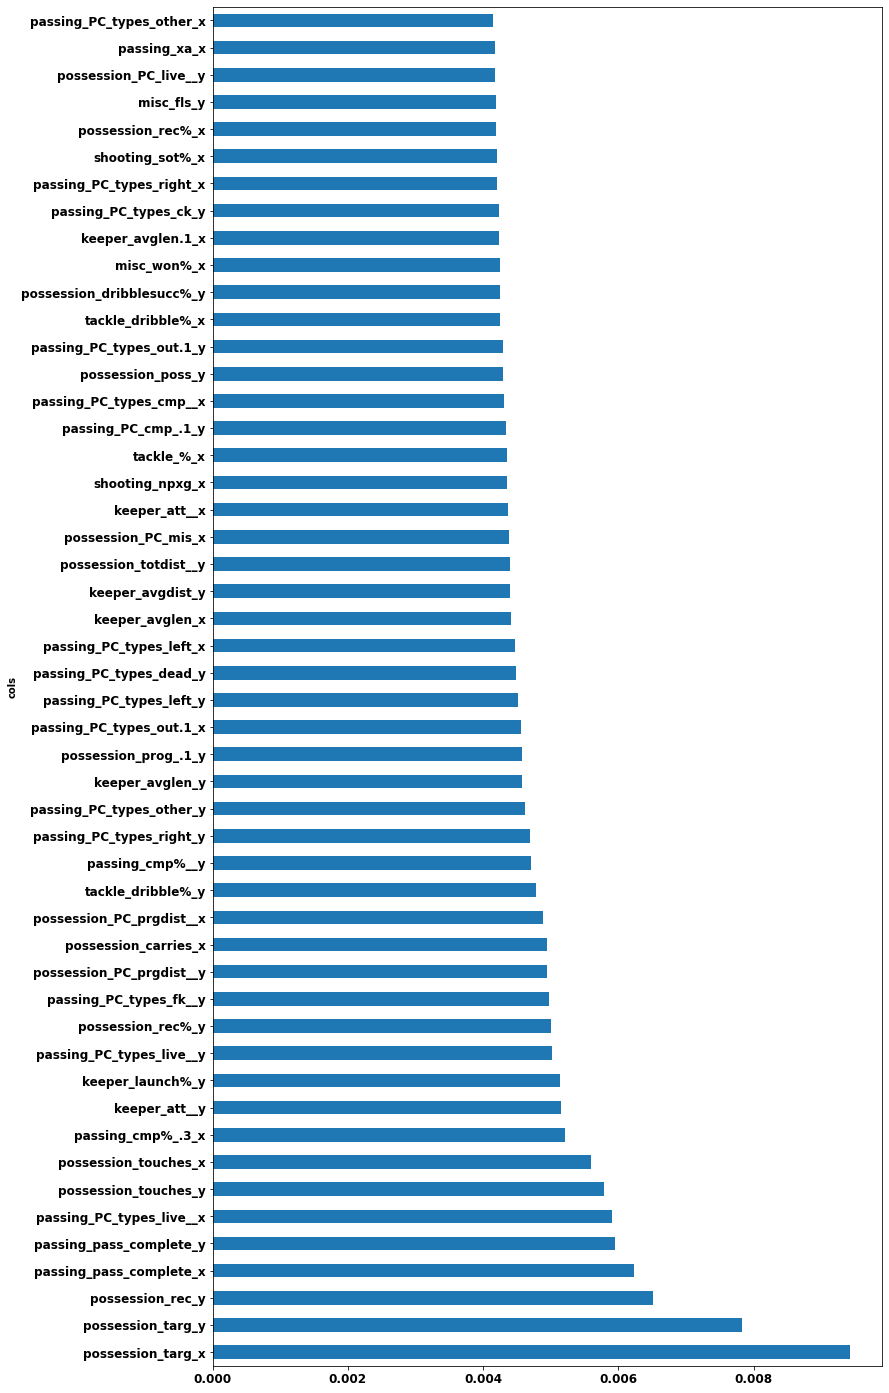

In [19]:
#collapse-output
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

# pred=rf.predict(train)
# pred_valid=best_random.predict(valid_xs)
fi = rf_feat_importance(clf, xs)

def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,25), legend=False,fontsize=12)

plot_fi(fi[:50]);

In [54]:
len(fi[fi['imp']>0.0042])


37

In [55]:
col_use = fi[fi['imp']>0.0042].cols.values

In [20]:
# xs,y = to.train.xs,to.train.y
# valid_xs,valid_y = to.valid.xs,to.valid.y

def do_fit_red_col(xs,valid_xs,y,valid_y,col_use,class_weight=None):
    xs_imp= xs[col_use]
    valid_xs_imp =valid_xs[col_use]
    clf_imp=RandomForestClassifier(random_state=42,class_weight=class_weight)
    clf_imp.fit(xs_imp,y)
    
    print('Number of parameters = ',len(col_use))
    print('Accuracy scores of train {:.3f} and validation {:.3f} sets'.format(\
    clf_imp.score(xs_imp,y),clf_imp.score(valid_xs_imp,valid_y)))
    
    return clf_imp

In [57]:
clf=do_fit_red_col(xs,valid_xs,y,valid_y, col_use)
pred=clf.predict(valid_xs[col_use])
crosstab=pd.crosstab(index = valid_y, columns = pred)
crosstab



Number of parameters =  37
Accuracy scores of train 1.000 and validation 0.479 sets


col_0,D,L,W
Win_x,,,
D,11,91,74
L,15,183,93
W,16,106,169


In [58]:

predictors_=['round','opponent_x','team_x','weekday']
clf=do_fit_red_col(xs,valid_xs,y,valid_y, predictors_)
pred=clf.predict(valid_xs[predictors_])
crosstab=pd.crosstab(index = valid_y, columns = pred)
crosstab

Number of parameters =  4
Accuracy scores of train 0.994 and validation 0.484 sets


col_0,D,L,W
Win_x,,,
D,31,73,72
L,42,171,78
W,40,86,165


In [59]:
clf=do_fit_red_col(xs,valid_xs,y,valid_y, predictors_,'balanced')
pred=clf.predict(valid_xs[predictors_])
crosstab=pd.crosstab(index = valid_y, columns = pred)
crosstab


Number of parameters =  4
Accuracy scores of train 0.994 and validation 0.479 sets


col_0,D,L,W
Win_x,,,
D,31,71,74
L,44,165,82
W,41,83,167


In [60]:
predictors_=['round','opponent_x','team_x','weekday']

[predictors_.append(x) for x in col_use]

clf=do_fit_red_col(xs,valid_xs,y,valid_y, predictors_)
pred=clf.predict(valid_xs[predictors_])
crosstab=pd.crosstab(index = valid_y, columns = pred)
crosstab

Number of parameters =  41
Accuracy scores of train 1.000 and validation 0.468 sets


col_0,D,L,W
Win_x,,,
D,7,88,81
L,18,177,96
W,8,112,171


In [61]:
matchesC=pd.read_csv(folda+'epl2017-2021_wivnetscore.csv')

X=matchesC.corr()
val =[ i for i,x in enumerate(X.columns) if x=='NetScore_x'][0]

corrnetscore=X.iloc[:,val:val+1].sort_values(by="NetScore_x").reset_index()
corrnetscore=corrnetscore.rename(columns={'index':'category'})
corrnetscore


,category,NetScore_x
0,NetScore_y,-1.000000
1,ground_y,-0.264919
2,cmp_passing.2_y,-0.264773
3,cmp_passing_y,-0.263268
4,rec_y,-0.263268
...,...,...
336,att_passing_x,0.307719
337,carries_x,0.307754
338,live_passing_types_x,0.307866
339,mid 3rd_possession_x,0.309859


In [62]:
Xuse=corrnetscore.loc[[x   for x in corrnetscore.index if ( (corrnetscore.loc[x,'category'][-1]=='x') & ( abs(corrnetscore.loc[x,'NetScore_x'])>0.26) )]]
# Xuse=corrnetscore.loc[[x   for x in corrnetscore.index if ( (corrnetscore.loc[x,'category'][-1]=='y') & ( abs(corrnetscore.loc[x,'NetScore_x'])>0.24) )]]

# Xuse=corrnetscore.loc[[x   for x in corrnetscore.index if (  ( abs(corrnetscore.loc[x,'NetScore_x'])>0.27) )]]

Xuse=list(Xuse[-20:-1].category.values)
Xuse



['att_passing.1_x',
 '1/3_passing_x',
 'prgdist_possession_x',
 'ground_x',
 'cmp_passing.2_x',
 'att_passing.2_x',
 'totdist_passing_x',
 'touches_x',
 'cmp_passing_types_x',
 'cmp_passing_x',
 'rec_x',
 'targ_x',
 'live_possession_x',
 'prog_possession_x',
 'att_passing_types_x',
 'att_passing_x',
 'carries_x',
 'live_passing_types_x',
 'mid 3rd_possession_x']

In [63]:
predictors_=['round','opponent_x','team_x','weekday']
[predictors_.append(x) for x in Xuse]

clf=do_fit_red_col(xs,valid_xs,y,valid_y, predictors_,'balanced')

pred=clf.predict(valid_xs[predictors_])
crosstab=pd.crosstab(index = valid_y, columns = pred)
crosstab


Number of parameters =  23
Accuracy scores of train 1.000 and validation 0.485 sets


col_0,D,L,W
Win_x,,,
D,18,101,57
L,12,203,76
W,13,131,147


In [64]:
xAll=pd.concat([valid_xs[predictors_]])
pred=clf.predict(xAll)

pc_draw = 100*len(pred[pred=='D'])/len(pred)

pc_win = 100*len(pred[pred=='W'])/len(pred)

pc_loss = 100*len(pred[pred=='L'])/len(pred)


print("Percentage draw {:.1f}%, win {:.1f}% and loss {:.1f}%".format( pc_draw,pc_win,pc_loss) )




Percentage draw 5.7%, win 36.9% and loss 57.4%


In [65]:
pc_draw = 100*len(df[df['Win_x']=='D'])/len(df)

pc_win = 100*len(df[df['Win_x']=='W'])/len(df)

pc_loss = 100*len(df[df['Win_x']=='L'])/len(df)


print("Percentage draw {:.1f}%, win {:.1f}% and loss {:.1f}%".format( pc_draw,pc_win,pc_loss) )




Percentage draw 22.8%, win 38.6% and loss 38.6%


In [66]:
col_use = fi[fi['imp']>0.004].cols.values
XX=[1, 10, 100, 1e3, 1e6, 1e9,1e30]
for Draw_weght in XX:
    print(Draw_weght)
    clf=do_fit_red_col(xs,valid_xs,y,valid_y, col_use,{'D':Draw_weght,'L':1,'W':1})
    pred=clf.predict(valid_xs[col_use])
    crosstab=pd.crosstab(index = valid_y, columns = pred)
    ratio_draw_good=100*crosstab.iloc[0,0]/sum(crosstab.iloc[0,:])
    print('weight draw = {}, how many draws predicted {:.1f}%'.format(Draw_weght,ratio_draw_good))
    



1
Number of parameters =  54
Accuracy scores of train 1.000 and validation 0.480 sets
weight draw = 1, how many draws predicted 2.8%
10
Number of parameters =  54
Accuracy scores of train 1.000 and validation 0.496 sets
weight draw = 10, how many draws predicted 6.2%
100
Number of parameters =  54
Accuracy scores of train 1.000 and validation 0.482 sets
weight draw = 100, how many draws predicted 4.0%
1000.0
Number of parameters =  54
Accuracy scores of train 1.000 and validation 0.474 sets
weight draw = 1000.0, how many draws predicted 5.7%
1000000.0
Number of parameters =  54
Accuracy scores of train 1.000 and validation 0.479 sets
weight draw = 1000000.0, how many draws predicted 4.5%
1000000000.0
Number of parameters =  54
Accuracy scores of train 1.000 and validation 0.503 sets
weight draw = 1000000000.0, how many draws predicted 6.2%
1e+30
Number of parameters =  54
Accuracy scores of train 0.227 and validation 0.232 sets
weight draw = 1e+30, how many draws predicted 100.0%


### Improve the results from hyper-parameters

`HalvingRandomSearchCV`, `RandomizedSearchCV` and `GridSearchCV` can be used to search for the best hyperparameters.

The random ones don't go through all the options, but pick combinations randomly. So they will be quicker but may not get the best result. You may want to do the random ones to get a rough idea of parameters followed by grid search on a reduced range.

The most important arguments are

- `cv` which is the number of folds to use for cross validation (we use the default values for cv of 5).
- `factor` the halving parameter (2 is used)
- (or `n_iter` for RandomizedSearchCV, which controls the number of different combinations to try)

More iterations or lower factor will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time.

In [21]:
n_estimators=[20,50,150,400,700]

# Number of features to consider at every split
max_features = ['log2','sqrt',None]

# Maximum number of levels in tree
max_depth=[10,  30,  70,  200, None]

# Minimum number of samples required to split a node
min_samples_split = [1.,2, 10,50]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,10]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Weights associated with classes 
class_weight=["balanced", "balanced_subsample",None]

#Complexity parameter used for Minimal Cost-Complexity Pruning.
ccp_alpha=[0., 0.1, 0.5]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight':class_weight,
               'ccp_alpha' : ccp_alpha

              }

clf = RandomForestClassifier()

rsh = HalvingRandomSearchCV(estimator = clf, param_distributions = random_grid, \
                              random_state=42, factor = 2)# Fit the random search model
rsh.fit(xs, y)

HalvingRandomSearchCV(estimator=RandomForestClassifier(), factor=2,
                      param_distributions={'bootstrap': [True, False],
                                           'ccp_alpha': [0.0, 0.1, 0.5],
                                           'class_weight': ['balanced',
                                                            'balanced_subsample',
                                                            None],
                                           'max_depth': [10, 30, 70, 200, None],
                                           'max_features': ['log2', 'sqrt',
                                                            None],
                                           'min_samples_leaf': [1, 2, 4, 10],
                                           'min_samples_split': [1.0, 2, 10,
                                                                 50],
                                           'n_estimators': [20, 50, 150, 400,
                                                            700]},
                      random_state=42)

In [22]:
rsh_best = rsh.best_estimator_
print(rsh_best)

print('Accuracy scores of train {:.3f} and validation {:.3f} sets'.format(\
rsh_best.score(xs,y),rsh_best.score(valid_xs,valid_y)))

pred=rsh_best.predict(valid_xs)
crosstab=pd.crosstab(index = valid_y, columns = pred)


    
crosstab

RandomForestClassifier(class_weight='balanced', max_depth=200,
                       max_features='log2', min_samples_leaf=4,
                       n_estimators=700)
Accuracy scores of train 0.981 and validation 0.522 sets


col_0,D,L,W
Win_x,,,
D,7,85,84
L,7,196,88
W,7,91,193


In [23]:
(85+7 +196+7 +193)/len(valid_xs)

0.6437994722955145

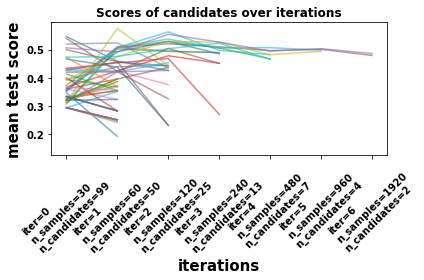

In [24]:
results = pd.DataFrame(rsh.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter", columns="params_str", values="mean_test_score"
)
ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"iter={i}\nn_samples={rsh.n_resources_[i]}\nn_candidates={rsh.n_candidates_[i]}"
    for i in range(rsh.n_iterations_)
]

ax.set_xticks(range(rsh.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("mean test score", fontsize=15)
ax.set_xlabel("iterations", fontsize=15)
plt.tight_layout()
plt.show()

In [174]:
# xs = train[predictors]
# valid_xs = valid[predictors]

# y = train[target]
# valid_y = valid[target]


20      D
22      L
23      W
24      W
25      L
       ..
3035    L
3036    L
3037    L
3038    L
3039    W
Name: Win_x, Length: 3002, dtype: object

In [246]:

def doLWD(yy):
    if yy=='W':
        return 2
    elif yy=='D':
        return 1
    elif yy=='L':
        return 0
y=y2.copy()
valid_y=valid_y2.copy()

y= y2.apply(doLWD)
valid_y= valid_y2.apply(doLWD)


random_grid = {'n_estimators': [50,100, 500, 1_000],
               'max_depth': [2, 4, 6, 8]
              }


In [28]:
predictors_=[]
[predictors_.append(x) for x in xs]



clf=do_fit_red_col(xs,valid_xs,y,valid_y, predictors_)

pred=clf.predict(valid_xs[predictors_])
crosstab=pd.crosstab(index = valid_y, columns = pred)
crosstab

from sklearn.metrics import f1_score

clf = XGBClassifier(n_estimators=500,max_depth=8,learning_rate=0.01)
clf.fit(xs, y,sample_weight=classes_weights)
# pred=clf.predict(valid_xs)
# prec=precision_score(valid_y,pred,average='binary')

# f1=f1_score(valid_y,pred)

print(clf.score(xs,y), clf.score(valid_xs,valid_y))#,f1)


crosstab=pd.crosstab(index = valid_y, columns = pred)
crosstab.columns.names=['predict']
crosstab.index.names=['actual']
crosstab
# 

Number of parameters =  326
Accuracy scores of train 1.000 and validation 0.521 sets


NameError: name 'classes_weights' is not defined

In [226]:
precision_score(valid_y,clf.predict(valid_xs),pos_label=1,average='binary')

# crosstab.iloc[1,1]/(crosstab.iloc[1,1]+crosstab.iloc[0,1])

0.375

In [166]:
y2

20      1
22      0
23      0
24      0
25      0
       ..
3035    0
3036    0
3037    0
3038    0
3039    0
Name: Win_x, Length: 3002, dtype: int64

In [130]:
# https://datascience.stackexchange.com/questions/16342/unbalanced-multiclass-data-with-xgboost
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y
)

In [237]:
def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    err = 1-f1_score(y_true, np.round(y_pred))
    return 'f1_err', err

def doXGB(n,md):
    clf = XGBClassifier(n_estimators=n, max_depth=md,learning_rate=0.01,eval_metric=f1_eval)
    clf.fit(xs, y,sample_weight=classes_weights)
    score_train = clf.score(xs,y)
    score_valid = clf.score(valid_xs,valid_y)
#     pred=clf.predict(valid_xs)
    prec=precision_score(valid_y,clf.predict(valid_xs),pos_label=1,average='binary')
    f1=f1_score(valid_y,clf.predict(valid_xs))
    
    return [score_train, score_valid,prec,f1]

res_xgb = np.zeros([len(random_grid['n_estimators'])*len(random_grid['max_depth']),6])
i=0
for md_vals in random_grid['max_depth']:
    for n_vals in random_grid['n_estimators']:
        res_xgb[i,0]=n_vals
        res_xgb[i,1]=md_vals
        print('---')
        print(n_vals,md_vals)
        res_xgb[i,2:]=doXGB(n_vals,md_vals)
        print(res_xgb[i,2:])
        i=i+1


---
50 2
[0.42638241 0.39313984 0.23992674 0.36288089]
---
100 2
[0.5176549  0.46306069 0.23076923 0.32727273]
---
500 2
[0.6479014  0.62269129 0.28174603 0.3317757 ]
---
1000 2
[0.72251832 0.63588391 0.2706422  0.29949239]
---
50 4
[0.57594937 0.47757256 0.24418605 0.34653465]
---
100 4
[0.63291139 0.57124011 0.27076923 0.35129741]
---
500 4
[0.87308461 0.676781   0.2745098  0.25531915]
---
1000 4
[0.94703531 0.68997361 0.25619835 0.20875421]
---
50 6
[0.71652232 0.54485488 0.26462396 0.35514019]
---
100 6
[0.77948035 0.56332454 0.26586103 0.34714004]
---
500 6
[0.97401732 0.69656992 0.26315789 0.20689655]
---
1000 6
[0.99766822 0.72823219 0.29166667 0.16935484]
---
50 8
[0.84943371 0.5883905  0.24814815 0.30044843]
---
100 8
[0.88041306 0.64116095 0.28378378 0.31658291]
---
500 8
[0.99766822 0.72955145 0.22641509 0.10480349]
---
1000 8
[1.         0.76253298 0.375      0.0625    ]


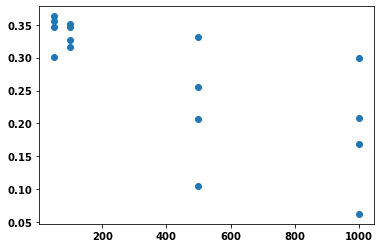

In [238]:
plt.plot(res_xgb[:,0],res_xgb[:,-1],'o')

In [29]:
clf = XGBClassifier(n_estimators=500, max_depth=4,num_class=2,eval_metric ='logloss',
                    learning_rate=0.01,objective='binary:logisticrob')

from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y
)

clf.fit(xs, y,sample_weight=classes_weights)
    
pred=clf.predict(valid_xs)
crosstab=pd.crosstab(index = valid_y, columns = pred)
    
crosstab
# from sklearn.metrics import balanced_accuracy_score
# balanced_accuracy_score(valid_y,pred)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['D' 'L' 'W']

In [114]:
clf.score(valid_xs, valid_y),(crosstab.iloc[0,0]+crosstab.iloc[1,1]+crosstab.iloc[2,2])/len(valid_y)
# [x==max(x) for x in clf.predict_proba(valid_xs)]

(0.4630606860158311, 0.4630606860158311)

## Try with a binary question: Does the team win?

Model seems poor at predicting draws- none are predicted

And poor at losses- 50:50 on those

Because of this lets change the question to a binary one

In [29]:
y2=y.copy()
valid_y2=valid_y.copy()

want_binary=1
if want_binary==1:
    y2[y=='D']='L'
    valid_y2[valid_y=='D']='L'
    

y2[y2=='L']=0
y2[y2=='W']=1

y2=y2.astype('int')

valid_y2[valid_y2=='L']=0
valid_y2[valid_y2=='W']=1

valid_y2=valid_y2.astype('int')

In [30]:
col_use = xs.columns

clf=do_fit_red_col(xs,valid_xs,y2,valid_y2, col_use)
pred_class_RF=clf.predict(valid_xs[col_use])
print('Length of predictors is: ',len(col_use))


crosstab=pd.crosstab(index = valid_y, columns = pred_class_RF)
crosstab

Number of parameters =  340
Accuracy scores of train 1.000 and validation 0.669 sets
Length of predictors is:  340


col_0,0,1
Win_x,,
D,143,33
L,257,34
W,184,107


In [31]:

predictors_=['round','opponent_x','team_x','weekday']
clf=do_fit_red_col(xs,valid_xs,y2,valid_y2, predictors_)
pred_class_RF_basic4=clf.predict(valid_xs[predictors_])
crosstab=pd.crosstab(index = valid_y2, columns = pred_class_RF_basic4)
print('Length of predictors is: ',len(predictors_))
print("The accuracy {:.3f} and precision {:.3f} of the validation data".\
format(accuracy_score(valid_y2, pred_class_RF_basic4),precision_score(valid_y2, pred_class_RF_basic4) ) )

crosstab

Number of parameters =  4
Accuracy scores of train 0.995 and validation 0.656 sets
Length of predictors is:  4
The accuracy 0.656 and precision 0.560 of the validation data


col_0,0,1
Win_x,,
0,358,109
1,152,139


In [32]:
clf=do_fit_red_col(xs,valid_xs,y2,valid_y2, xs.columns)
fi = rf_feat_importance(clf, xs)
col_use = fi[fi['imp']>0.0042].cols.values

clf=do_fit_red_col(xs,valid_xs,y2,valid_y2, col_use)
pred_class_RF_imp=clf.predict(valid_xs[col_use])
print('Length of predictors is: ',len(col_use))
print("The accuracy {:.3f} and precision {:.3f} of the validation data".\
format(accuracy_score(valid_y2, pred_class_RF_imp),precision_score(valid_y2, pred_class_RF_imp) ) )

crosstab=pd.crosstab(index = valid_y2, columns = pred_class_RF_imp)
crosstab

Number of parameters =  340
Accuracy scores of train 1.000 and validation 0.669 sets
Number of parameters =  49
Accuracy scores of train 1.000 and validation 0.661 sets
Length of predictors is:  49
The accuracy 0.661 and precision 0.593 of the validation data


col_0,0,1
Win_x,,
0,393,74
1,183,108


In [33]:
predictors_=['round','opponent_x','team_x','weekday']
[predictors_.append(x) for x in col_use]

clf=do_fit_red_col(xs,valid_xs,y2,valid_y2, predictors_,'balanced')
pred_class_RF_impBasic=clf.predict(valid_xs[predictors_])
print("The accuracy {:.3f} and precision {:.3f} of the validation data".\
format(accuracy_score(valid_y2, pred_class_RF_impBasic),precision_score(valid_y2, pred_class_RF_impBasic) ) )
print('Length of predictors is: ',len(predictors_))
crosstab=pd.crosstab(index = valid_y2, columns = pred_class_RF_impBasic)
crosstab

Number of parameters =  53
Accuracy scores of train 1.000 and validation 0.666 sets
The accuracy 0.666 and precision 0.628 of the validation data
Length of predictors is:  53


col_0,0,1
Win_x,,
0,412,55
1,198,93


In [34]:


clf=do_fit_red_col(xs,valid_xs,y2,valid_y2, Xuse)
pred_class_RF_corr=clf.predict(valid_xs[Xuse])

print("The accuracy {:.3f} and precision {:.3f} of the validation data".\
format(accuracy_score(valid_y2, pred_class_RF_corr),precision_score(valid_y2, pred_class_RF_corr) ) )

print('Length of predictors is: ',len(Xuse))
crosstab=pd.crosstab(index = valid_y2, columns = pred_class_RF_corr)
crosstab

Number of parameters =  19
Accuracy scores of train 1.000 and validation 0.632 sets
The accuracy 0.632 and precision 0.544 of the validation data
Length of predictors is:  19


col_0,0,1
Win_x,,
0,405,62
1,217,74


In [35]:


predictors_=['round','opponent_x','team_x','weekday']
[predictors_.append(x) for x in Xuse]

clf=do_fit_red_col(xs,valid_xs,y2,valid_y2, predictors_)
pred_class_RF_corrBasic=clf.predict(valid_xs[predictors_])

print('number of predictors =',len(predictors_))

print("The accuracy {:.3f} and precision {:.3f} of the validation data".\
format(accuracy_score(valid_y2, pred_class_RF_corrBasic),precision_score(valid_y2, pred_class_RF_corrBasic) ) )


crosstab=pd.crosstab(index = valid_y2, columns = pred_class_RF_corrBasic)
crosstab

Number of parameters =  23
Accuracy scores of train 1.000 and validation 0.656 sets
number of predictors = 23
The accuracy 0.656 and precision 0.604 of the validation data


col_0,0,1
Win_x,,
0,410,57
1,204,87


In [36]:
predictors_=['round','opponent_x','team_x','weekday']
[predictors_.append(x) for x in col_use]

clf=do_fit_red_col(xs,valid_xs,y2,valid_y2, predictors_,'balanced')
pred_class_RF_balanced=clf.predict(valid_xs[predictors_])
print("The accuracy {:.3f} and precision {:.3f} of the validation data".\
format(accuracy_score(valid_y2, pred_class_RF_balanced),precision_score(valid_y2, pred_class_RF_balanced) ) )
print('Length of predictors is: ',len(predictors_))
crosstab=pd.crosstab(index = valid_y2, columns = pred_class_RF_balanced)
crosstab

Number of parameters =  53
Accuracy scores of train 1.000 and validation 0.666 sets
The accuracy 0.666 and precision 0.628 of the validation data
Length of predictors is:  53


col_0,0,1
Win_x,,
0,412,55
1,198,93


## Try as a regression problem


In [ ]:
dfAll=pd.read_csv(folda+'epl2017-2021_wivnetscore_both-HA.csv')
dfAll=dfAll.iloc[20:,:]
df=copy.copy(dfAll)
df=df.drop(columns=['Unnamed: 0','opponent_y','team_y'])


df=df.dropna()
df["opponent_x"] = df["opponent_x"].astype("category").cat.codes
df["team_x"] = df["team_x"].astype("category").cat.codes

train=df.loc[cond].copy()
valid=df.loc[~cond].copy()

target = 'NetScore_x'
predictors = [x for x in train.columns if ((x != 'Win_x') & (x != 'NetScore_x') )]

xs = train[predictors]
valid_xs = valid[predictors]

y = train[target]
valid_y = valid[target]


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_RF=RandomForestRegressor(random_state=42)
model_RF.fit(xs,y)

In [ ]:
def get_scores2(nom,predd, yy):

    prec=precision_score(predd, np.array(yy)) 
    acc=accuracy_score(predd, np.array(yy))

    print("{}: accuracy = {:.3f} and precision = {:.3f}".format(nom,acc,prec))
    
def get_reg_scores(yy,preds,XX,binary=True):
    yy=copy.copy(yy)
    preds=copy.copy(preds)
    
    if binary:
        yy[yy>0],yy[yy<=0] = 1, 0
        preds[preds>=XX], preds[preds<XX]=1, 0
        
        get_scores2(str(model_RF.base_estimator),preds, yy)
    else:
        yy[yy>0]=1
        yy[yy==0]=0
        yy[yy<0]=-1
        
        preds[preds>=XX]=1
        preds[preds<-XX]=-1
        preds[( (preds>=-XX) & (preds<XX) )]=0
    
        preds_yy=np.array(preds-yy)
        preds_yy=preds-yy
        print( len(preds_yy[preds_yy==0])/len(yy) )

    


    return preds,yy

In [ ]:
pred_reg_RF=model_RF.predict(valid_xs)

new_preds,new_y=get_reg_scores(valid_y,pred_reg_RF,.5)

crosstab=pd.crosstab(index = new_y, columns = new_preds)
crosstab

In [ ]:
new_preds,new_y=get_reg_scores(valid_y,pred_reg_RF,.25,False)

crosstab=pd.crosstab(index = new_y, columns = new_preds)
crosstab.columns.name='Predicted'
crosstab.index.name='Actual'
crosstab

In [ ]:
np.sum(np.diag(np.array(crosstab))  )/np.sum(np.sum(crosstab))

In [ ]:
from xgboost import XGBRegressor
model_XGB = XGBRegressor(n_estimators=1000, learning_rate=0.01) # Your code here
# Fit the model
model_XGB.fit(xs, y) 
pred_reg_XGB = model_XGB.predict(valid_xs)
new_preds,new_y=get_reg_scores(valid_y,pred_reg_XGB,.5)

crosstab=pd.crosstab(index = new_y, columns = new_preds)
crosstab.columns.name='Predicted'
crosstab.index.name='Actual'
crosstab

In [ ]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=21) # Your code here
# Fit the model
model_ridge.fit(xs, y) 
pred_reg_ridge = model_ridge.predict(valid_xs)
new_preds,new_y=get_reg_scores(valid_y,pred_reg_ridge,.5)

crosstab=pd.crosstab(index = new_y, columns = new_preds)
crosstab.columns.name='Predicted'
crosstab.index.name='Actual'
crosstab

### Gradient Boosting Regressor

In [ ]:
dfAll=pd.read_csv(folda+'epl2017-2021_wivnetscoreAndGFGA_both-HA.csv')
dfAll=dfAll.iloc[20:,:]
df=copy.copy(dfAll)
df=df.drop(columns=['Unnamed: 0','opponent_y','team_y','GoalsAgainst_x','GoalsFor_x'])


df=df.dropna()
df["opponent_x"] = df["opponent_x"].astype("category").cat.codes
df["team_x"] = df["team_x"].astype("category").cat.codes
df["venue_x"] = df["venue_x"].astype("category").cat.codes

train=df.loc[cond].copy()
valid=df.loc[~cond].copy()

target='NetScore_x'

predictors = [x for x in train.columns if ((x != 'Win_x') & (x != 'NetScore_x')  )]

xs = train[predictors]
valid_xs = valid[predictors]

y = train[target]
valid_y = valid[target]


In [ ]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(xs, y)

mse = mean_squared_error(valid_y, reg.predict(valid_xs))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

In [ ]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(valid_xs)):
    test_score[i] = reg.loss_(valid_y, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [ ]:
pred_reg_gradboost = reg.predict(valid_xs)
new_preds_comb,new_y=get_reg_scores(valid_y, pred_reg_gradboost,.5)

crosstab=pd.crosstab(index = new_y, columns = new_preds_comb)
crosstab

## Regression of Goals For and Goals Against


In [ ]:
dfAll=pd.read_csv(folda+'epl2017-2021_wivnetscoreAndGFGA_both-HA.csv')
dfAll=dfAll.iloc[20:,:]
df=copy.copy(dfAll)
df=df.drop(columns=['Unnamed: 0','opponent_y','team_y','NetScore_x'])


df=df.dropna()
df["opponent_x"] = df["opponent_x"].astype("category").cat.codes
df["team_x"] = df["team_x"].astype("category").cat.codes
df["venue_x"] = df["venue_x"].astype("category").cat.codes

train=df.loc[cond].copy()
valid=df.loc[~cond].copy()




In [ ]:
predictors

In [ ]:
def get_scores2(nom,predd, yy):

    prec=precision_score(predd, np.array(yy)) 
    acc=accuracy_score(predd, np.array(yy))

    print("{}: accuracy = {:.3f} and precision = {:.3f}".format(nom,acc,prec))
    
def get_reg_scores_Goals(yy,preds,XX,binary=True):
    yy=copy.copy(yy)
    preds=copy.copy(preds)
    
    
    yy[yy>0],yy[yy<=0] = 1, 0
    preds[preds>=XX], preds[preds<XX]=1, 0

    get_scores2('Regression RF',preds, yy)


In [ ]:

def doGFGA(target,train,valid,model='RF'):
    
    predictors = [x for x in train.columns if ((x != 'Win_x') & (x != 'GoalsFor_x') & (x != 'GoalsAgainst_x') )]

    xs = train[predictors]
    valid_xs = valid[predictors]

    y = train[target]
    valid_y = valid[target]
    
    if model!='RF':
        print('XGB')
        model_RF = XGBRegressor(n_estimators=1000, learning_rate=0.01)
    else:
        model_RF=RandomForestRegressor(random_state=42)
        print('RF')
    
    model_RF.fit(xs,y)
    pred_RF=model_RF.predict(valid_xs)
    
    return pred_RF
    
def doGFGA_outer(model='RF'):
    target = 'GoalsFor_x'
    pred_GF=doGFGA(target,train,valid,model)
    
    target = 'GoalsAgainst_x'
    pred_GA=doGFGA(target,train,valid,model)
    
    
    
    return pred_GF, pred_GA


In [ ]:
pred_GF, pred_GA = doGFGA_outer()

pred_reg_GFGA_RF=pred_GF-pred_GA

In [ ]:
new_preds_comb,new_y=get_reg_scores(valid['GoalsFor_x']-valid['GoalsAgainst_x'],pred_reg_GFGA_RF,.5)

crosstab=pd.crosstab(index = new_y, columns = new_preds_comb)
crosstab

In [ ]:
new_preds_comb,new_y=get_reg_scores(valid['GoalsFor_x']-valid['GoalsAgainst_x'],pred_reg_GFGA_RF,.5,False)

crosstab=pd.crosstab(index = new_y, columns = new_preds_comb)
crosstab

In [ ]:
# from xgboost import XGBRegressor
pred_GF_, pred_GA_ = doGFGA_outer('XGB')
pred_reg_GFGA_XGB=pred_GF-pred_GA

In [ ]:
new_preds_comb_,new_y=get_reg_scores(valid['GoalsFor_x']-valid['GoalsAgainst_x'],\
                                     pred_reg_GFGA_XGB,.5)
crosstab=pd.crosstab(index = new_y, columns = new_preds_comb_)
crosstab

In [ ]:
# # pred_RF

# new_preds_comb_,new_y=get_reg_scores(valid['GoalsFor_x']-valid['GoalsAgainst_x'],0.5*(pred_GF-pred_GA+pred_RF),.5)
# valid_y
# crosstab=pd.crosstab(index = new_y, columns = new_preds_comb_)
# crosstab

pred_reg_GFGA_XGB[0:10],pred_reg_GFGA_RF[0:10]



### Ensembling

    Think back to the original reasoning behind why random forests work so well: each tree has errors, but those errors are not correlated with each other, so the average of those errors should tend towards zero once there are enough trees. Similar reasoning could be used to consider averaging the predictions of models trained using different algorithms.
    
    In our case, we have two very different models.. It would be reasonable to expect that the kinds of errors that each one makes would be quite different. Therefore, we might expect that the average of their predictions would be better than either one's individual predictions.
    
    from fastai

In [ ]:
new_preds,new_y=get_reg_scores(valid_y,
   (pred_reg_RF+pred_reg_XGB+pred_reg_gradboost)/3,.5);
crosstab=pd.crosstab(index = new_y, columns = new_preds)
crosstab.columns.name='Predicted'
crosstab.index.name='Actual'
crosstab

In [ ]:
pred_BIG=(1/2)*( pred_reg_GFGA_RF + pred_reg_RF )

new_preds_comb,new_y=get_reg_scores(valid_y, pred_BIG,.5)
crosstab=pd.crosstab(index = new_y, columns = new_preds_comb)
crosstab



## Summary 


|Accuracy W/L/D|Accuracy Win |Classification/Regression| Details|
|--------------|------------|---------|----|
|0.489		|0.669|		Classification|RF with all parameters|
|0.479		|0.661|		Classification|RF with 43 parameters from feature imp|
|0.487		|0.666|		Classification| RF as above with basic features|
|0.484		|0.656|		Classification| RF with 4 basic features|
|0.479		|-	|      	Classification| RF with 4 basic ones + balanced|
|0.485		|0.656|		Classification| RF with 23 correlation parameters plus basic|
|0.451		|0.678|		Regression| RF with all parameters on net score |
|-			|0.657|		Regression| XGB with all parameters on net score |
|-          |0.639|     Regression| Ridge with all parameters on net score |
|-          |0.666|     Regression| Grad boost with all parameters on net score |
|0.427      |0.670|     Regression| RF with all parameters on GF/GA |
|-          |0.670|     Regression| XGB with all parameters on GF/GA score |
|-          |0.665|     Regression| RF+XGB+Grad boost on netscore |
|-          |0.678|     Regression| RF on netscore + RF on GF/GA |